#### References:
    www.python.org
    www.numpy.org
    www.matplotlib.org
    https://pandas.pydata.org

#### Questions/feedback: petert@digipen.edu

# Data Wrangling

* **Joins and Merging**
    - Inner Join
    - Outer Join
    - Left Join
    - Right Join
    - Cartesian Product
* **Binding**
* **Patching**

## Joins
* Data may be in several different dataframes and combining/merging them is a natural requirement.
* These are major ways of joining: Innner Join, Full Outer Join, left, right and Cartesian Join
* All assumes an index type of feature (unique values) on which we can join on.

### Inner Join
- joining on a key
- keys represented which are in both dataframes
- missing key in either dataframe will be dropped: their entire row will be missing
- no missing data in the joined dataframe
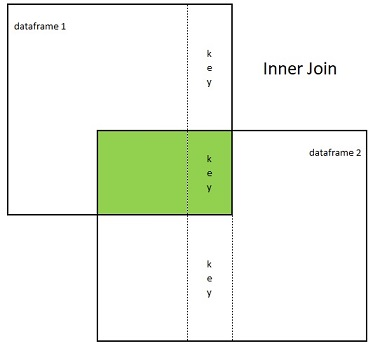

### Full Outer Join
- joining on a key
- keys represented in either dataframes (opposite of Inner Join)
- there will be no missing keys from either dataframes: their entire rows will be present
- there may be missing data in the joined dataframe (NaNs)
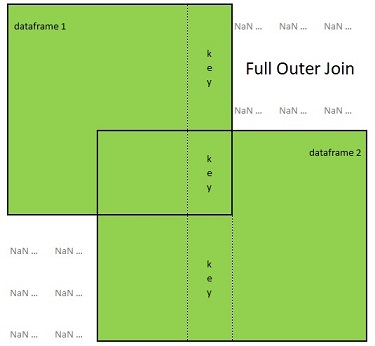

### Left Join
- joining on a key
- keys represented from left dataframe only
- data will be included for keys which are also in the right dataframe, the rest will be dropped
- there may be some missing data in the joined dataframe from the right dataframe (no common keys) but some maybe added from the right dataframe (common keys)
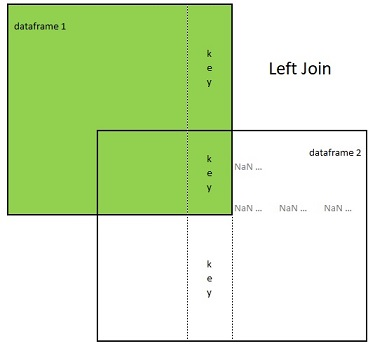

### Right Join
- joining on a key
- keys represented from right dataframe only (opposite of Left Join)
- data will be included for keys which are also in the left dataframe, the rest will be dropped
- there may be some missing data in the joined dataframe from the left dataframe (no common keys) but some maybe added from the left dataframe (common keys)
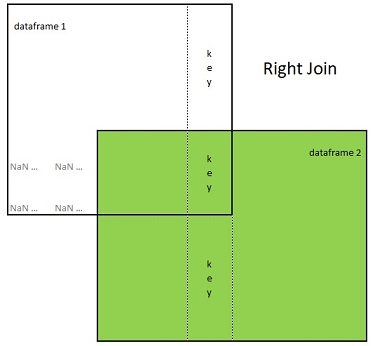

### Cartesian Product (Cartesian Join, Cross Join)
- joining on a key
- all the combinations of key pairs

#### Examples
Lets create two dataframes with integer value keys
   * Join on these keys (unique identifiers)
   * Left dataframe will be filled with ages in year
   * Right dataframe will be filled with heights in cm and weights in kg

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
# create left dataframe
df_left  = pd.DataFrame([[1, 2, 4, 5, 7],
                         [18, 25, 24, 20, 19]])
df_left = df_left.transpose()
df_left.columns = ['key1', 'age']

# create right dataframe
df_right = pd.DataFrame({'key2':   [2, 3, 5, 6, 7, 8],
                        'height': [180, 160, 158, 185, 190, 170],
                        'weight': [70, 60, 60, 75, 85, 80]})

In [3]:
df_left

,key1,age
0,1,18
1,2,25
2,4,24
3,5,20
4,7,19


In [4]:
df_right

,key2,height,weight
0,2,180,70
1,3,160,60
2,5,158,60
3,6,185,75
4,7,190,85
5,8,170,80


Note the common keys are 2, 5 and 7

##### Example for Inner Join:

In [5]:
df_inner = pd.merge(df_left, df_right, left_on='key1', right_on='key2')
df_inner

,key1,age,key2,height,weight
0,2,25,2,180,70
1,5,20,5,158,60
2,7,19,7,190,85


**Notes:**
 - only rows for common keys are in the joined dataframe
 - all available features are present for these rows
 - if features have the same name in the dataframes, joining on them is "automatic", no need to specify *on, left_on/right_on*
 - always best to explicitly specify what to join on
 - key1 and key2 features are the exact same due to inner join creation, one of them can be dropped from the joined dataframe
 - *how=* specifies the type of join, default is *how='inner'*
 
##### Example for Full Outer Join:

In [6]:
df_outer = pd.merge(df_left, df_right, left_on='key1', right_on='key2', how='outer')
df_outer

,key1,age,key2,height,weight
0,1.0,18.0,NaN,NaN,NaN
1,2.0,25.0,2.0,180.0,70.0
2,4.0,24.0,NaN,NaN,NaN
3,5.0,20.0,5.0,158.0,60.0
4,7.0,19.0,7.0,190.0,85.0
5,NaN,NaN,3.0,160.0,60.0
6,NaN,NaN,6.0,185.0,75.0
7,NaN,NaN,8.0,170.0,80.0


**Notes:**
 - all rows for any keys are in the joined dataframe
 - all available features are present
 - *NaN*s are now filled in where there (missing data) are no available values
 - key1 and key2 features are both needed in the joined dataframe (same key name could be used but then the data origin gets lost in the outer join)
 - a single *key* feature could be created based on logic:
     - if (key1 and key2) exist ==> keep key1
     - if only key1 exists      ==> keep key1
     - if only key2 exists      ==> keep key2
 
##### Example for Left Join:

In [7]:
df_leftjoin = pd.merge(df_left, df_right, left_on='key1', right_on='key2', how='left')
df_leftjoin

,key1,age,key2,height,weight
0,1,18,NaN,NaN,NaN
1,2,25,2.0,180.0,70.0
2,4,24,NaN,NaN,NaN
3,5,20,5.0,158.0,60.0
4,7,19,7.0,190.0,85.0


**Notes:**
 - only rows with keys from left dataframe are in the joined dataframe
 - all available features are present
 - *NaN*s are now filled in where there (missing data) are no available values
 - key2 feature could be dropped in the joined dataframe
 
##### Example for Right Join:

In [ ]:
df_rightjoin = pd.merge(df_left, df_right, left_on='key1', right_on='key2', how='right')
df_rightjoin

**Notes:**
 - only rows with keys from right dataframe are in the joined dataframe
 - all available features are present
 - *NaN*s are now filled in where there (missing data) are no available values
 - key1 feature could be dropped in the joined dataframe

##### Example joining on the same key and track which feature comes from which dataframe:
* use *on=* and *suffixes=*

In [8]:
# create both dataframes but use the same label for key and use another label with same name
# create left dataframe
df_left  = pd.DataFrame([[1, 2, 4, 5, 7],
                         [18, 25, 24, 20, 19]])
df_left = df_left.transpose()
df_left.columns = ['key', 'age']
print('Left dataframe:')
display(df_left)

# create right dataframe
df_right = pd.DataFrame({'key':   [2, 3, 5, 6, 7, 8],
                        'height': [180, 160, 158, 185, 190, 170],
                        'age': [70, 60, 60, 75, 85, 80]})
print('Right dataframe:')
display(df_right)

df_inner = pd.merge(df_left, df_right, on='key', how='inner', suffixes=['_left', '_right'])
print('Inner join:')
df_inner

Left dataframe:


,key,age
0,1,18
1,2,25
2,4,24
3,5,20
4,7,19


Right dataframe:


,key,height,age
0,2,180,70
1,3,160,60
2,5,158,60
3,6,185,75
4,7,190,85
5,8,170,80


Inner join:


,key,age_left,height,age_right
0,2,25,180,70
1,5,20,158,60
2,7,19,190,85


**Notes:**
* the key is not duplicated as we joined on it
* the overlapping column names are now suffixed and we know their origins
* the key can also be the index itself: *left_index=* or *right_index=*

##### Example for Cartesian Join:

In [9]:
df_left.assign(foo=1)

,key,age,foo
0,1,18,1
1,2,25,1
2,4,24,1
3,5,20,1
4,7,19,1


In [10]:
df_right.assign(foo=1)

,key,height,age,foo
0,2,180,70,1
1,3,160,60,1
2,5,158,60,1
3,6,185,75,1
4,7,190,85,1
5,8,170,80,1


In [11]:
# create left dataframe
df_left  = pd.DataFrame([list('abc'),
                         [18, 25, 24]])
df_left = df_left.transpose()
df_left.columns = ['key1', 'age']

# create right dataframe
df_right = pd.DataFrame({'key2':   list('abcd'),
                        'height': [180, 160, 158, 185],
                        'weight': [70, 60, 60, 75]})

df_cartesian = df_left.assign(foo=1).merge(df_right.assign(foo=1)).drop('foo', 1)

In [12]:
print('Left dataframe, shape = ', df_left.shape)
display(df_left)
print('Right dataframe, shape = ', df_right.shape)
display(df_right)
print('Cartesian product, shape =        ' + str(df_cartesian.shape), '\nThe number of observations are =  ' + str(df_left.shape[0]) + '*' + str(df_right.shape[0]),'\nThe number of features are =          ' + str(df_left.shape[1]) + '+' + str(df_right.shape[1]))
df_cartesian

Left dataframe, shape =  (3, 2)


,key1,age
0,a,18
1,b,25
2,c,24


Right dataframe, shape =  (4, 3)


,key2,height,weight
0,a,180,70
1,b,160,60
2,c,158,60
3,d,185,75


Cartesian product, shape =        (12, 5) 
The number of observations are =  3*4 
The number of features are =          2+3


,key1,age,key2,height,weight
0,a,18,a,180,70
1,a,18,b,160,60
2,a,18,c,158,60
3,a,18,d,185,75
4,b,25,a,180,70
5,b,25,b,160,60
6,b,25,c,158,60
7,b,25,d,185,75
8,c,24,a,180,70
9,c,24,b,160,60


**Notes:**
* all key pair combinations are listed as separate rows (3x4=12)
* no *NaN*s are present

## Binding
* Binding is also referred to as Stacking or Concatenation
* Binding is tied to an axis
* Indices may be different when binding
* method: pandas.Dataframe.**concat()**

##### Example
Bind/concatenate a set of series with disjunct indexes

In [13]:
s1 = pd.Series([0,2,4], index=['a', 'c', 'e'])
s2 = pd.Series([1,6], index=['b', 'g'])
s3 = pd.Series([3,5], index=['d', 'f'])

s_binded = pd.concat([s1, s2, s3])
s_binded

a    0
c    2
e    4
b    1
g    6
d    3
f    5
dtype: int64

**Notes:**
* all rows are present in the binded series
* that we don't get an "automatic" sort on the new index

Now lets see what happens when there are overlapping indices:

In [14]:
s1 = pd.Series([0,2,4], index=['a', 'c', 'e'])
s2 = pd.Series([1,6], index=['a', 'g'])
s3 = pd.Series([3,5], index=['d', 'g'])

s_binded = pd.concat([s1, s2, s3])
s_binded

a    0
c    2
e    4
a    1
g    6
d    3
g    5
dtype: int64

Note that all indices are kept and so we may not immediately know the origin of a row.

Now lets see what happens when we change the default axis:

In [15]:
s1 = pd.Series([0,2,4], index=['a', 'c', 'e'])
s2 = pd.Series([1,6], index=['b', 'g'])
s3 = pd.Series([3,5], index=['d', 'f'])

print(s1)
print(s2)
print(s3)

s_binded = pd.concat([s1, s2, s3], axis=1, sort=True)
s_binded

a    0
c    2
e    4
dtype: int64
b    1
g    6
dtype: int64
d    3
f    5
dtype: int64


,0,1,2
a,0.0,NaN,NaN
b,NaN,1.0,NaN
c,2.0,NaN,NaN
d,NaN,NaN,3.0
e,4.0,NaN,NaN
f,NaN,NaN,5.0
g,NaN,6.0,NaN


**Notes:**
* The result is a dataframe due to "perpendicular" axis being used to bind
* Full outer join has happened, join type can be specified using *inner=*
* Sorting happenes automatically, it can be turned off using *sort=False*

Now lets see what happens when there are overlapping indices:

In [16]:
s1 = pd.Series([0,2,4], index=['a', 'c', 'e'])
s2 = pd.Series([1,6], index=['a', 'g'])
s3 = pd.Series([3,5], index=['d', 'g'])

print(s1)
print(s2)
print(s3)

s_binded = pd.concat([s1, s2, s3], axis=1, sort=True)
s_binded

a    0
c    2
e    4
dtype: int64
a    1
g    6
dtype: int64
d    3
g    5
dtype: int64


,0,1,2
a,0.0,1.0,NaN
c,2.0,NaN,NaN
d,NaN,NaN,3.0
e,4.0,NaN,NaN
g,NaN,6.0,5.0


Note the result shows less rows than earlier. It is not a full outer join due to the overlapping indices

Example using join:

In [ ]:
s1 = pd.Series([0,2,4], index=['a', 'c', 'e'])
s2 = pd.Series([1,6], index=['c', 'g'])
s3 = pd.Series([3,5], index=['c', 'g'])

s_binded = pd.concat([s1, s2, s3], axis=1, join='inner')
s_binded

Note that now the binding happened as a join

## Patching
* Patching certain values of a dataframe can be useful
* Patch applied could be another dataframe
* Indices and column names may be different when patching
* method: pandas.Dataframe.**combine_first()**

##### Example
Patch a dataframe's missing data using another dataframe:

In [17]:
df = pd.DataFrame([[0, np.nan, 2, np.nan, 4], 
                   [2, np.nan, 1, 3, np.nan], 
                   [4, 5, 2, np.nan, 1], 
                   [4, 5, 2, 3, 1]])
print("A dataframe with some NaNs:\n\n", df)

df_patch = pd.DataFrame(np.random.randint(90,100, size=(2, 7)))

print("\nAnother dataframe to patch with:")
df_patch

A dataframe with some NaNs:

    0    1  2    3    4
0  0  NaN  2  NaN  4.0
1  2  NaN  1  3.0  NaN
2  4  5.0  2  NaN  1.0
3  4  5.0  2  3.0  1.0

Another dataframe to patch with:


,0,1,2,3,4,5,6
0,95,93,93,91,98,96,93
1,96,93,93,93,91,95,95


In [18]:
df_patched = df.combine_first(df_patch)
df_patched

,0,1,2,3,4,5,6
0,0,93.0,2,91.0,4.0,96.0,93.0
1,2,93.0,1,3.0,91.0,95.0,95.0
2,4,5.0,2,NaN,1.0,NaN,NaN
3,4,5.0,2,3.0,1.0,NaN,NaN


**Notes:**
* All rows are present from the *base* dataframe
* Only the first two rows were patched as there are less rows in the *patch*
* All columns are present
* There are *patch* values in the newly added columns in the *patched*     rows 
* There are *NaN*s  values in the newly added columns in the *non-patched* rows

Example where index and column names overlap:

In [ ]:
df = pd.DataFrame([[0, np.nan, 2, np.nan, 4], 
                   [2, np.nan, 1, 3, np.nan], 
                   [4, 5, 2, np.nan, 1], 
                   [4, 5, 2, 3, 1]])
print("A dataframe with some NaNs:\n\n", df)

df_patch = pd.DataFrame(np.random.randint(90,100, size=(2, 7)), index=list('ab'), columns=list('12C4EF7'))

print("\nAnother dataframe to patch with:")
df_patch

In [ ]:
df_patched = df.combine_first(df_patch)
df_patched

**Notes:**
 - all rows and columns are present in the joined dataframe
 - *NaN*s are now filled in where there (missing data) are no available values

#### Homework 15.1:
Create Joins
- Create a dataframe of random integers between 1 and 8   with shape (3, 5)
- Create a dataframe of random integers between 90 and 99 with shape (4, 2)
- Set column names as letter randomly from 'ab' and 'abcde'
- Set first column as a key from 1 to 3 (and 1 to 4)
- Create
    - Inner Join
    - Outher Join
    - Left Join
    - Right Join
    - Cross Join

In [ ]:
# Homework 15.1 code comes here:



#### Homework 15.2:
Pathc a dataframe
- Create a dataframe of random integers between 1 and 100 with shape (10, 10)
- Change 10 values (at random locations) to *NaN*s
- Create a dataframe of strings of 'patch' with shape (10, 10)
- Patch the first dataframe with the second dataframe
- Extra:
    - change the second dataframe in a way that the patching will result the mean values of the first dataframe columns
    - achieve the same without patching

In [ ]:
# Homework 15.2 code comes here:

